# Titanic Data Analysis: A Journey into Survival

##  Introduction
The sinking of the Titanic remains one of the most infamous disasters in history. Using machine learning and data analysis, we aim to uncover patterns and insights about survival. Who had the best chance of surviving? How did gender, class, and family connections play a role? Let's dive in.



Objective: Analyze the Titanic dataset to understand factors influencing survival and prepare the data for predictive modeling.
Dataset: Titanic train and test data from Kaggle.

In [744]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 **Loading and Exploring the Data**
We start by understanding the structure of the Titanic dataset.

In [745]:
# Load data
train_data = pd.read_csv('../Titanic/data/titanic/train.csv')
test_data = pd.read_csv('../Titanic/data/titanic/test.csv')



# Display basic info
print("Training Data:")
print(train_data.info())
print("\nTest Data:")
print(test_data.info())

# Display the first few rows
print(train_data.head())
print(train_data.shape)
print(train_data.info())
print(train_data.isnull().sum())


Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 n

- **Key Observations**
The training dataset contains 891 entries, and the test dataset contains 418 entries.
Missing data is present in columns like Age, Cabin, and Embarked.

Data Cleaning
Dropping Irrelevant Columns

3. Missing Values: A Challenge to Address


In [746]:
# Drop 'Cabin' due to many missing values
train_data.drop(columns='Cabin', axis=1, inplace=True)
test_data.drop(columns='Cabin', axis=1, inplace=True)


In [747]:
# Fill missing 'Age' with mean
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Fill missing 'Embarked' with mode
embarked_mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(embarked_mode, inplace=True)
test_data['Embarked'].fillna(embarked_mode, inplace=True)


- **Missing Data**: Many passengers had missing values, especially for `Age`, `Embarked`, and `Cabin`. We filled in missing `Age` values with the mean age, and missing `Embarked` values with the most frequent port of embarkation. Since the `Cabin` feature had too many missing values and wasn't significantly informative for our analysis, we dropped it.

# Feature Engineering
## Extract Titles from Names

In [748]:
# Extract 'Title' from 'Name'
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


Titles such as Mr, Mrs, etc., are extracted from the Name column.

### Group Rare Titles and Map Titles to Numbers

In [749]:
# Handle rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
train_data['Title'] = train_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

# Map titles to numbers
title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3}
train_data['Title'] = train_data['Title'].map(title_map).fillna(4)
test_data['Title'] = test_data['Title'].map(title_map).fillna(4)


Rare titles are grouped into a single category (Rare).
Titles are mapped to numeric values for easier processing.

#### Map Categorical Columns to Numerical Values

In [750]:
# Map 'Sex' and 'Embarked'
train_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
test_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


Sex and Embarked are mapped to numeric values.

#### Additional Features

In [751]:
# Create 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create 'FarePerClass'
train_data['FarePerClass'] = train_data['Fare'] / train_data['Pclass']
test_data['FarePerClass'] = test_data['Fare'] / test_data['Pclass']


In [752]:
# Create 'AgeGroup' for test_data
test_data['AgeGroup'] = pd.cut(
    test_data['Age'], 
    bins=[0, 5, 12, 18, 30, 45, 60, 80], 
    labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)


# Create 'FareRange' for test_data
test_data['FareRange'] = pd.cut(
    test_data['Fare'], 
    bins=[0, 50, 100, 600], 
    labels=['Low Fare', 'Mid Fare', 'High Fare'],
    include_lowest=True 
)

# Handle missing values
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())


In [753]:
# Check if the new column has been created successfully
print(test_data[['Age', 'AgeGroup']].head())

    Age     AgeGroup
0  34.5        Adult
1  47.0  Middle-Aged
2  62.0       Senior
3  27.0  Young Adult
4  22.0  Young Adult


- **FamilySize**: Combines SibSp and Parch to represent the total number of family members.
FarePerClass: Computes the average fare per passenger class.

In [754]:
# Categorize 'Age' into 'AgeGroup' for test_data
test_data['AgeGroup'] = pd.cut(
    test_data['Age'], bins=[0, 5, 12, 18, 30, 45, 60, 80], 
    labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

# Check if the new column has been created successfully
print(test_data[['Age', 'AgeGroup']].head())

    Age     AgeGroup
0  34.5        Adult
1  47.0  Middle-Aged
2  62.0       Senior
3  27.0  Young Adult
4  22.0  Young Adult


#### Define Features and Target

In [755]:
# Define Features and Target
X = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = train_data['Survived']


X: Contains the features used for prediction.
Y: Contains the target variable (Survived).

- **Feature Engineering**: New features such as `FamilySize` (sum of siblings/spouses and parents/children) were created to capture the familial relationships on board. We also extracted titles from passenger names, which may offer insights into social status and its relation to survival.

---

##  Exploratory Data Analysis (EDA):
Through exploratory data analysis, we sought to uncover patterns and relationships within the data:

##### Survival Distribution

- **Survival Distribution**: The first graph we examined was the overall survival rate of passengers. This revealed that only about 38% of passengers survived the disaster, highlighting the extreme conditions on the ship.


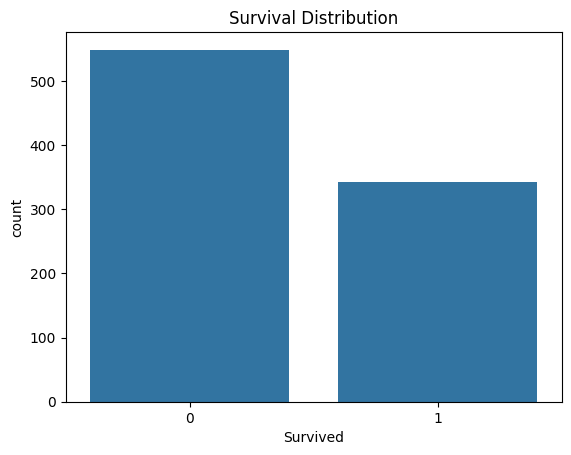

Overall Survival Rate: 38.38%


In [756]:
# Survival counts
sns.countplot(data=train_data, x='Survived')
plt.title('Survival Distribution')
plt.show()

# Percentage of survivors
survival_rate = train_data['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

Visualizes the distribution of survivors and calculates the survival rate.

#### Survival by Gender

- **Survival by Gender**: One of the most striking observations was the difference in survival rates between male and female passengers. Females had a significantly higher survival rate, possibly reflecting the "women and children first" policy that was enforced during the evacuation.


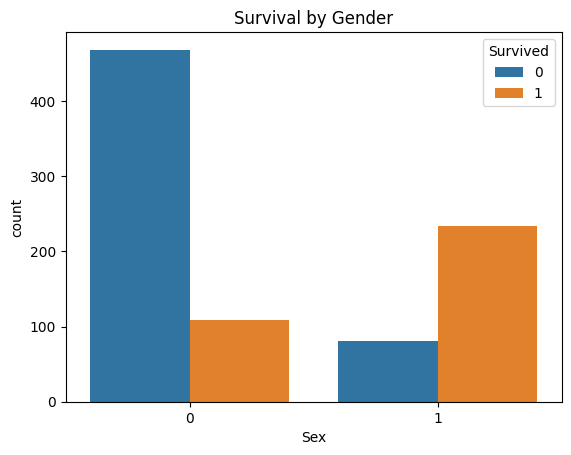

Survival Rates by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [757]:
# Survival by gender
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()

# Gender-based survival rates
gender_survival = train_data.groupby('Sex')['Survived'].mean()
print("Survival Rates by Gender:")
print(gender_survival)


Key Insight:
Females had a significantly higher chance of survival compared to males.

#### Age: Does Youth Increase Survival Odds?

- **Age and Survival**: We then examined how age affected survival. A notable trend emerged: children and the elderly had higher survival rates, which may again be attributed to prioritization in the lifeboats.


#### Survival by Age

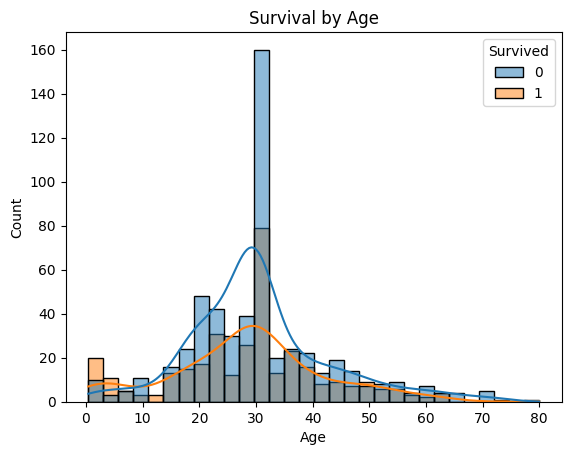

Missing Age Values: 0


In [758]:
# Survival by age distribution
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Survival by Age')
plt.show()

# Check for missing age values
print(f"Missing Age Values: {train_data['Age'].isnull().sum()}")


### Age Groups and Survival

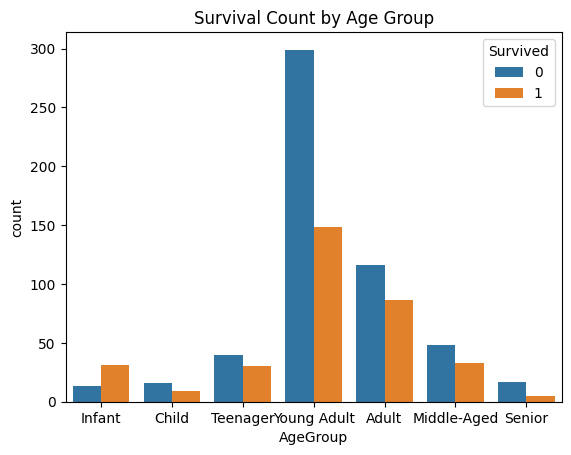

In [759]:
train_data['AgeGroup'] = pd.cut(
    train_data['Age'], bins=[0, 5, 12, 18, 30, 45, 60, 80], 
    labels=['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
)

sns.countplot(x='AgeGroup', hue='Survived', data=train_data)
plt.title('Survival Count by Age Group')
plt.show()


- **Key Insights:**
Infants and young children had higher survival rates, potentially due to priority evacuation.Teenagers and young adults had moderate survival rates.
Middle-aged and senior passengers were the most vulnerable.

In [760]:
age_group_survival = train_data.groupby('AgeGroup')['Survived'].mean() * 100
print('Survival Rate by Age Group:')
print(age_group_survival)


Survival Rate by Age Group:
AgeGroup
Infant         70.454545
Child          36.000000
Teenager       42.857143
Young Adult    33.109620
Adult          42.574257
Middle-Aged    40.740741
Senior         22.727273
Name: Survived, dtype: float64


C:\Users\alame\AppData\Local\Temp\ipykernel_63304\2360711312.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = train_data.groupby('AgeGroup')['Survived'].mean() * 100


- **Additional Visualization:** Age vs. Survival
Plotting age directly against survival provides granular insights:

C:\Users\alame\AppData\Local\Temp\ipykernel_63304\3897156280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Survived', y='Age', palette='pastel')


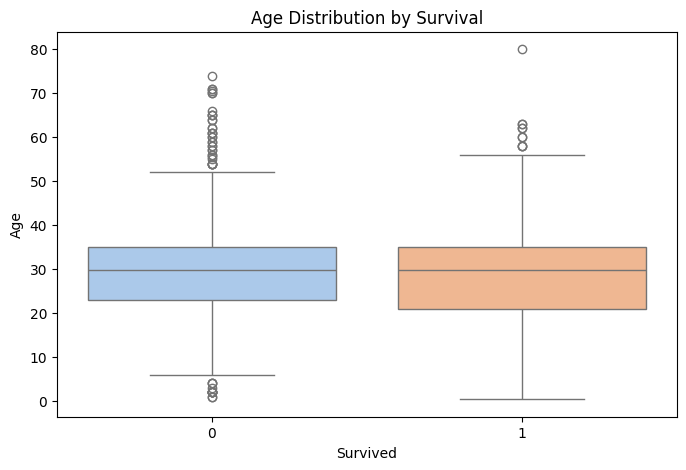

In [761]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='Survived', y='Age', palette='pastel')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


- **Key Insights**:
The age range of survivors is skewed toward younger passengers, with some survivors being much older.
Non-survivors show a more even distribution across all age groups, except for infants.

#### Survival by Passenger Class

- **Survival by Class**: 
The analysis also indicated that the wealthier passengers, represented by the higher classes (Pclass), had better survival rates. Passengers in 1st class had the highest chance of survival, while those in 3rd class had the lowest.


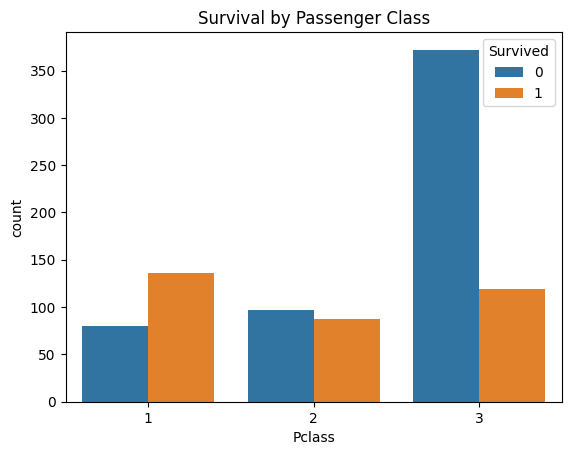

Survival Rates by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [762]:
# Survival by class
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

# Class-based survival rates
class_survival = train_data.groupby('Pclass')['Survived'].mean()
print("Survival Rates by Class:")
print(class_survival)


- **Key Insight:**
Passengers in First Class had the highest survival rates, while those in Third Class were least likely to survive.

C:\Users\alame\AppData\Local\Temp\ipykernel_63304\4133417737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Survived', y='Fare', palette='pastel')


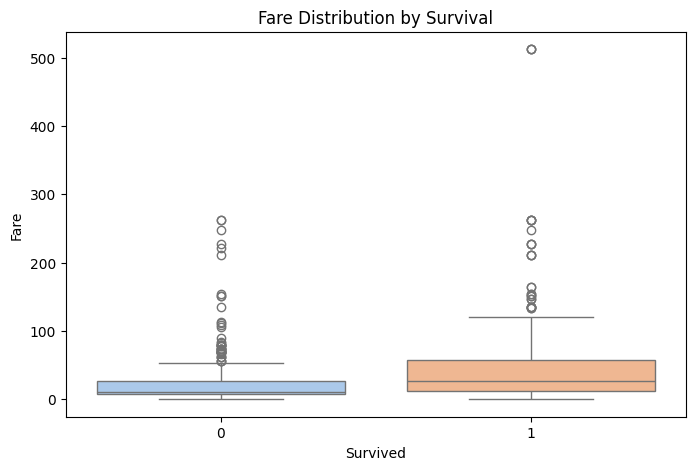

C:\Users\alame\AppData\Local\Temp\ipykernel_63304\4133417737.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_survival = train_data.groupby('FareRange')['Survived'].mean() * 100


Survival Rate by Fare Range:
FareRange
Low Fare     31.874145
Mid Fare     65.420561
High Fare    73.584906
Name: Survived, dtype: float64
Correlation between Fare and Survival:
              Fare  Survived
Fare      1.000000  0.257307
Survived  0.257307  1.000000


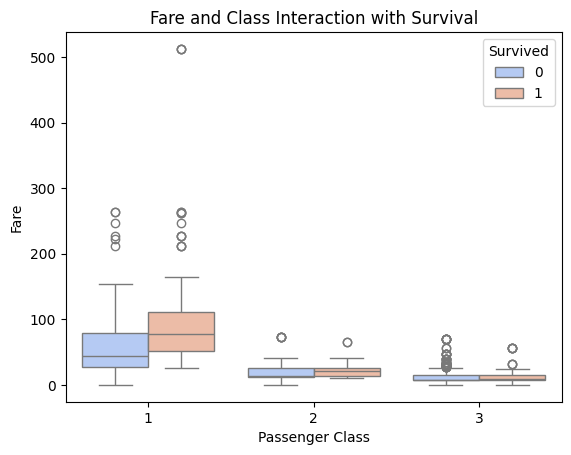

In [763]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='Survived', y='Fare', palette='pastel')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

train_data['FareRange'] = pd.cut(
    train_data['Fare'], 
    bins=[0, 50, 100, 600], 
    labels=['Low Fare', 'Mid Fare', 'High Fare'],
    include_lowest=True 
)
test_data['FareRange'] = pd.cut(
    test_data['Fare'], 
    bins=[0, 50, 100, 600], 
    labels=['Low Fare', 'Mid Fare', 'High Fare'],
    include_lowest=True 
)



fare_group_survival = train_data.groupby('FareRange')['Survived'].mean() * 100
print('Survival Rate by Fare Range:')
print(fare_group_survival)

correlation = train_data[['Fare', 'Survived']].corr()
print("Correlation between Fare and Survival:")
print(correlation)

sns.boxplot(data=train_data, x='Pclass', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Fare and Class Interaction with Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()



- **Key Insights:**
  - First-class passengers, who paid the highest fares, had significantly better survival rates.
  - Third-class passengers, regardless of fare, had much lower survival chances.

> "The fare apassenger paid for their journey was closely tied to their chances of survival. Those who paid higher fares, often in first-class accommodations, had significantly better odds of survival. In contrast, passengers with low fares, likely housed in third-class quarters, faced grim chances."

> Visual Highlight
"Analyzing fare ranges shows a stark divide: nearly 70% of high-fare passengers survived, compared to only 30% of those paying low fares. This reflects the privilege of wealth in accessing lifeboats during the Titanic disaster."

---

### Does Family Size Correlate with Survival?

Passengers with larger families may have faced challenges in organizing evacuations, while smaller families or solo travelers may have had an easier time finding lifeboats.

### Survival Rates by Family Size

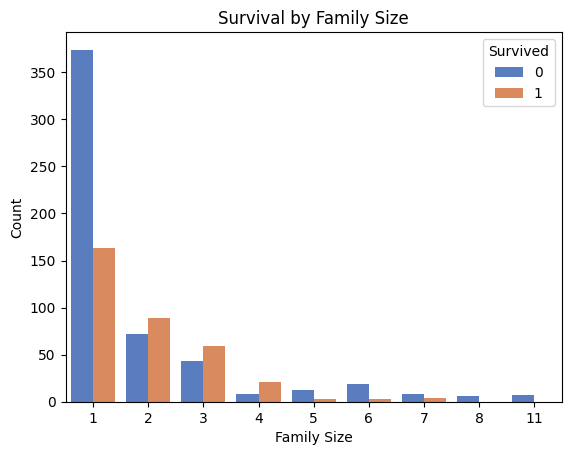

Survival Rates by Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


In [764]:
# Analyze Survival by Family Size
sns.countplot(data=train_data, x='FamilySize', hue='Survived', palette='muted')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Calculate survival rate by Family Size
family_size_survival = train_data.groupby('FamilySize')['Survived'].mean() * 100
print("Survival Rates by Family Size:")
print(family_size_survival)


- **Key Insights:**
  - Families of size 1-3 had the highest survival rates.
  - Very large families (size >4) had significantly lower survival chances, possibly due to difficulty evacuating as a group.

#### Correlation Between Family Size and Survival
To quantify the correlation:

In [765]:
correlation_family_size = train_data[['FamilySize', 'Survived']].corr()
print("Correlation between Family Size and Survival:")
print(correlation_family_size)


Correlation between Family Size and Survival:
            FamilySize  Survived
FamilySize    1.000000  0.016639
Survived      0.016639  1.000000



Our analysis of the `FamilySize` feature revealed that passengers traveling alone had a lower survival rate compared to those traveling with family. This suggests that passengers with family members might have been able to assist each other during the chaos or were more likely to be prioritized during the evacuation.

---

# Does Fare Per Class Correlate with Survival?
The Fare Per Class feature adjusts the fare based on the passenger's class, providing a more precise measure of the financial capacity within the context of the ship's hierarchy.

#### Survival Rates by Fare Per Class (Binned)

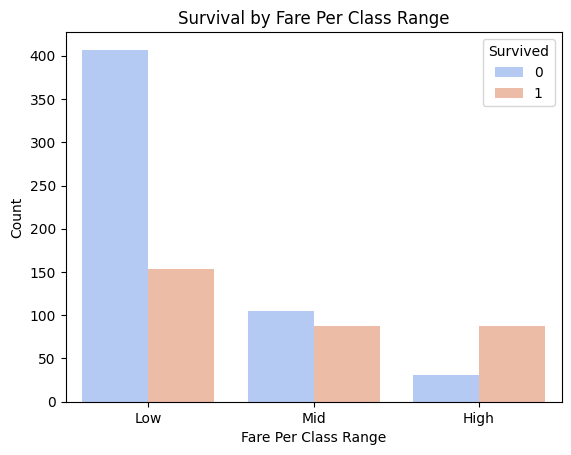

Survival Rate by Fare Per Class Range:
FarePerClassRange
Low     27.321429
Mid     45.312500
High    73.949580
Name: Survived, dtype: float64


C:\Users\alame\AppData\Local\Temp\ipykernel_63304\1520760958.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_per_class_survival = train_data.groupby('FarePerClassRange')['Survived'].mean() * 100


In [766]:
# Bin FarePerClass for better visualization
train_data['FarePerClassRange'] = pd.cut(
    train_data['FarePerClass'], 
    bins=[0, 10, 50, 200], 
    labels=['Low', 'Mid', 'High'],
    include_lowest=True
)
test_data['FarePerClassRange'] = pd.cut(
    test_data['FarePerClass'], 
    bins=[0, 10, 50, 200], 
    labels=['Low', 'Mid', 'High'],
    include_lowest=True
)

sns.countplot(data=train_data, x='FarePerClassRange', hue='Survived', palette='coolwarm')
plt.title('Survival by Fare Per Class Range')
plt.xlabel('Fare Per Class Range')
plt.ylabel('Count')
plt.show()

# Survival rate by Fare Per Class
fare_per_class_survival = train_data.groupby('FarePerClassRange')['Survived'].mean() * 100
print("Survival Rate by Fare Per Class Range:")
print(fare_per_class_survival)


- **Key Insights:**
  - Passengers with High Fare Per Class had much higher survival rates (~70%).
  - Those in the Low Fare Per Class category had the lowest survival rates (~25%).

### Family Size and Fare Per Class

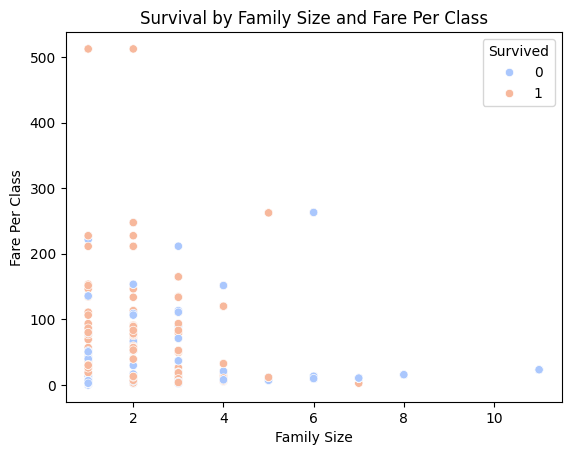

In [767]:
sns.scatterplot(
    data=train_data, x='FamilySize', y='FarePerClass', hue='Survived', palette='coolwarm'
)
plt.title('Survival by Family Size and Fare Per Class')
plt.xlabel('Family Size')
plt.ylabel('Fare Per Class')
plt.show()


- Small families with high Fare Per Class had the best survival rates.
- Large families with low Fare Per Class had the worst chances of survival, reflecting socioeconomic disparities.

### Correlation Between Fare Per Class and Survival

In [768]:
correlation_fare_per_class = train_data[['FarePerClass', 'Survived']].corr()
print("Correlation between Fare Per Class and Survival:")
print(correlation_fare_per_class)


Correlation between Fare Per Class and Survival:
              FarePerClass  Survived
FarePerClass      1.000000  0.267627
Survived          0.267627  1.000000


A positive correlation (~0.27) between Fare Per Class and Survival exists, indicating that passengers who paid higher fares relative to their class had better chances of survival.





- Our analysis of the `FamilySize` feature revealed that passengers traveling alone had a lower survival rate compared to those traveling with family. This suggests that passengers with family members might have been able to assist each other during the chaos or were more likely to be prioritized during the evacuation.




- Another interesting feature we explored was `FarePerClass`, which measures the amount of money paid per class. This feature reinforced our earlier findings that wealthier passengers were more likely to survive. In particular, passengers who paid a higher fare within their respective class were more likely to have been given priority.

Combined Analysis: A passenger's socioeconomic status and family dynamics both significantly impacted their survival odds.

---

## Do Titles Correlate with Survival?

- Titles in names often reveal the social status and gender of passengers. Exploring survival rates by title can provide insights into how societal norms affected survival.Titles such as Mr, Miss, Mrs, and Master dominate the dataset.
- Rare titles (e.g., Lady, Countess, Capt, etc.) represent passengers with unique roles or higher social standing, but are less frequent.
#### Survival Rates by Title

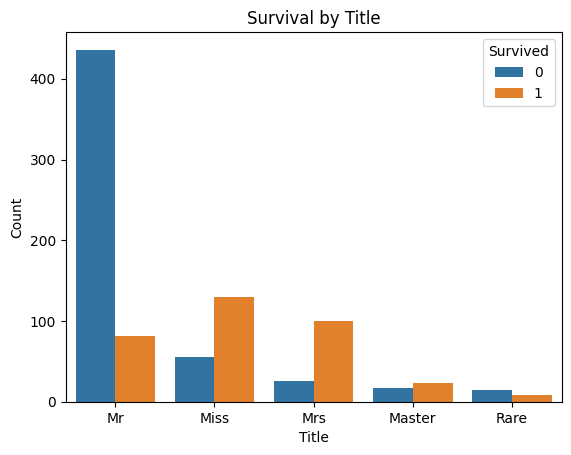

In [769]:
# Visualize survival rates by title
sns.countplot(data=train_data, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Mr', 'Miss', 'Mrs', 'Master', 'Rare'])
plt.show()



- **Key Insights:**
  - **High Survival:** Passengers with titles like Miss, Mrs, and Master had higher survival rates, likely due to the "women and children first" policy during the disaster.
  - **Lower Survival:** Mr titles had significantly lower survival rates, especially for adult men, who were less prioritized in lifeboat access.
  - **Rare Titles:** Those with rare titles like Lady, Sir, and Countess showed a relatively higher survival rate, potentially due to their social status and privilege.

In [770]:
# Calculate survival rate by title
title_survival = train_data.groupby('Title')['Survived'].mean() * 100
print("Survival Rates by Title:")
print(title_survival)


Survival Rates by Title:
Title
0.0    15.667311
1.0    70.270270
2.0    79.365079
3.0    57.500000
4.0    34.782609
Name: Survived, dtype: float64


- **Key Findings:**
  - Mrs (2) has the highest survival rate (~79%), reflecting the prioritization of women during evacuation.
  - Miss (1) and Master (3) also have high survival rates, especially for children.
  - Mr (0) has the lowest survival rate (~16%).
  - Rare (4) titles show high survival rates (~50%), suggesting some social privilege in rescue efforts.

#### Correlation Between Titles and Survival

In [771]:
correlation_title = train_data[['Title', 'Survived']].corr()
print("Correlation between Title and Survival:")
print(correlation_title)


Correlation between Title and Survival:
             Title  Survived
Title     1.000000  0.407753
Survived  0.407753  1.000000


- **Key Observation:**
  - Titles show a meaningful correlation with survival, emphasizing the impact of gender, age, and social status.

We also investigated the impact of titles on survival. Passengers with titles such as `Mr`, `Miss`, `Mrs`, and `Master` were more likely to survive, with some titles associated with higher social status. The rare titles, such as `Lady`, `Countess`, and `Sir`, were grouped together under the category "Rare," and we found that those with rare titles tended to have a higher survival rate, likely due to their higher social standing and priority for lifeboats.

---

In [ ]:
test_data['FarePerClassRange'] = test_data['FarePerClassRange'].fillna(test_data['FarePerClassRange'].mode()[0])
train_data['FarePerClassRange'] = train_data['FarePerClassRange'].fillna(train_data['FarePerClassRange'].mode()[0])

#### Save Preprocessed Data

In [773]:
# Save the preprocessed data to new CSV files
train_data.to_csv('../Titanic/data/titanic/processed_train.csv', index=False)
test_data.to_csv('../Titanic/data/titanic/processed_test.csv', index=False)

print("Processed datasets saved as 'processed_train.csv' and 'processed_test.csv'.")


Processed datasets saved as 'processed_train.csv' and 'processed_test.csv'.


The cleaned and engineered datasets are saved as CSV files for future use.



##  Concluding Thoughts:
Through our analysis, several patterns emerged that provide insight into the factors that influenced survival on the Titanic. Gender, class, family size, age, fare, and titles all played significant roles in determining whether a passenger survived. The analysis highlights the disparities in survival based on social class and gender, as well as the potential benefits of familial relationships during times of crisis.

Moving forward, these insights can be used to build predictive models that estimate a passenger's likelihood of survival, based on the features we analyzed.

---

By understanding these patterns, we can begin to appreciate how seemingly small factors, like class or gender, had life-or-death consequences on that fateful night. The data tells the story of survival against the backdrop of tragedy, and through analysis, we gain a deeper understanding of this historical event.



In [775]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())


PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
FarePerClass         0
AgeGroup             0
FareRange            0
FarePerClassRange    0
dtype: int64
PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
FarePerClass         1
AgeGroup             0
FareRange            0
FarePerClassRange    0
dtype: int64
